# Section 10 Introduction to Machine Learning and Linear Regression

## Motivating Example I: Single-variable (1D) Linear Regression

### **Problem**
Given the *training dataset* $\left(x^{(i)}\in\mathbb{R},y^{(i)}\in\mathbb{R}\right)$, $i= 1,2,..., N$ (in other words the $x$-values and $y$-values are real numbers), we want to find the linear function $$y\approx f(x)=wx +b$$ that fits the relations between $x^{(i)}$ and $y^{(i)}$. So that given any new $x^{test}$ in the **test** dataset, we can make the prediction $$y^{pred} = w x^{test}+b$$

#### To compare to section 9's notation:

$$ \theta = (w,b) $$
$$ y\approx f(x; \theta) = f(x; w, b)=wx +b$$ In the above line, the semicolon separates variables into two categories: data variable $x$ to the left, and function parameters $\theta$ (or $w,b$) on the right. Our model depends on the parameters, but they won't change after we find the line of best fit.

For the rest of section 10, we will be dropping the mention of $\theta$ and it's associated variables in our notation for $f$. 

### Training the model

- With the training dataset, define the loss function $L(w,b)$ of parameter $w$ and $b$, which is also called **mean squared error** (MSE) $$\text{MSE} = L(w,b)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y^{(i)}\big)^2=\frac{1}{N}\sum_{i=1}^N\big((wx^{(i)}+b)-y^{(i)}\big)^2,$$ where $\hat{y}^{(i)}$ denotes the predicted value of y at $x^{(i)}$, i.e. $\hat{y}^{(i)} = wx^{(i)}+b$.


- Then find the minimum of the loss function. Note $L(w,b)$ is a quadratic function of $w$ and $b$, and we can analytically solve $\partial_{w}L = \partial_{b}L =0$ (exactly the same as finding the minimum in multivariable calculus -- Math 2D), and yields

$$ w^* =\frac{\sum_{i=1}^{N}(x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{\sum_{i=1}^{N}(x^{(i)}-\bar{x})^{2}} = \frac{\frac{1}{N}\sum_{i=1}^{N}(x^{(i)}-\bar{x})(y^{(i)}-\bar{y})}{\frac{1}{N}\sum_{i=1}^{N}(x^{(i)}-\bar{x})^{2}} = \frac{\text{Cov}(X,Y)}{\text{Var}(X)},$$

$$ b^* = \bar{y}  - w^*\bar{x},$$

where $\bar{x}$ and $\bar{y}$ are the mean of $x$ and of $y$, and $\text{Cov}(X,Y)$ denotes the estimated covariance (or called sample covariance) between $X$ and $Y$ (a little difference with what you learn in statistics is that we have the normalization factor $1/N$ instead of $1/(N-1)$ here), and $\text{Var}(Y)$ denotes the sample variance of $Y$ (the normalization factor is still $1/N$). This is just about convention -- in statistics, they pursue the unbiased estimator.)

### Evaluating the model

- MSE: The smaller MSE indicates better performance
- R-Squared: The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^2 = \frac{\text{Var}(Y) - \text{MSE}}{\text{Var}(Y)}$$

The above calculation is a theoretical explanation for $R^2$. The equation below is for simpler calculation.

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

In [47]:
import numpy as np

class MyLinearRegression1D:
    '''
    The single-variable linear regression estimator -- writing in the style of sklearn package
    '''
        
    def fit(self, x, y):
        '''
        Determine the optimal parameters w, b for the input data x and y
        
        Parameters
        ----------
           x : 1D numpy array with shape (n_samples,) from training data
           y : 1D numpy array with shape (n_samples,) from training data
        
        Returns
        -------
        self : returns an instance of self, with new attributes slope w (float) and intercept b (float)
         '''
        
        cov_mat = np.cov(x,y,bias=True) # covariance matrix, bias = True makes the factor is 1/N -- but it doesn't matter actually, since the factor will be cancelled
        #array of form [[Var(x), Cov(x,y)],
        #                [Cov(x,y), Var(y))]]
        self.w = cov_mat[0,1] / cov_mat[0,0] # the (0,1) element is COV(X,Y) and (0,0) element is Var(X). (1,1) is Var(Y)
        self.b =  np.mean(y)-self.w * np.mean(x)
        
    def predict(self,x):
        '''
        Predict the output values for the input value x, based on trained parameters
        
        Parameters
        ----------
           x : 1D numpy array from training or test data 
        
        Returns
        -------
        returns 1D numpy array of same shape as input, the predicted y value of corresponding x
        '''
        
        return self.w*x+self.b #uses array vectorization to avoid loop. Entire array is scalar multiplied by w, and all terms +b.
    
    def score(self, x, y):
        '''
        Calculate the R-squared on the dataset with input x and y
        
        Parameters
        ----------
           x : 1D numpy array with shape (n_samples,) from training or test data
           y : 1D numpy array with shape (n_samples,) from training or test data
        
        Returns
        -------
        returns float, the R^2 value
        '''
        
        y_hat = self.predict (x) # predicted y
        mse = np.mean((y-y_hat)**2) # mean squared error
        return 1- mse / np.var(y) # return R-squared
    
    

In [48]:
import pandas as pd
house = pd.read_csv('kc_house_data.csv')
house.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4479,984200590,20150310T000000,315001.0,3,1.75,1500,10230,1.0,0,0,...,7,1500,0,1968,0,98058,47.4349,-122.168,1770,8374
19759,8924100370,20140915T000000,1210000.0,4,3.50,3590,5335,2.0,0,2,...,9,3140,450,2006,0,98115,47.6762,-122.267,2100,6250
10698,537000075,20140811T000000,420000.0,3,2.75,2300,8000,1.0,0,0,...,7,1430,870,1965,0,98003,47.3293,-122.306,2070,10200
9365,5708500315,20140623T000000,615000.0,5,2.00,2130,4180,1.5,0,0,...,7,1270,860,1926,0,98116,47.5750,-122.388,1710,4180
10108,7853250070,20150417T000000,679975.0,4,2.50,3830,4644,2.0,0,0,...,8,2900,930,2004,0,98065,47.5384,-121.880,3400,6163


In [49]:
house.drop(['id','date','zipcode','lat','long','yr_built','yr_renovated'],axis = 1, inplace = True)
house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287


<a id='X_house'></a>
(This cell is a bookmark to the assignment of X below)

In [50]:
X = house.iloc[:,1:].to_numpy() #every column except price
y = house['price'].to_numpy()

In [51]:
X.shape

(21613, 13)

Text(0, 0.5, 'price')

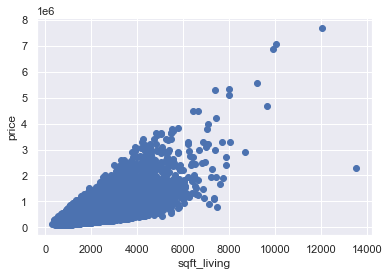

In [52]:
import matplotlib.pyplot as plt
x = X[:,2]
plt.scatter(x,y)
plt.xlabel('sqft_living') 
plt.ylabel('price')

In [53]:
lreg = MyLinearRegression1D() # initialize the instance of one estimator
help(lreg)

Help on MyLinearRegression1D in module __main__ object:

class MyLinearRegression1D(builtins.object)
 |  The single-variable linear regression estimator -- writing in the style of sklearn package
 |  
 |  Methods defined here:
 |  
 |  fit(self, x, y)
 |      Determine the optimal parameters w, b for the input data x and y
 |      
 |      Parameters
 |      ----------
 |         x : 1D numpy array with shape (n_samples,) from training data
 |         y : 1D numpy array with shape (n_samples,) from training data
 |      
 |      Returns
 |      -------
 |      self : returns an instance of self, with new attributes slope w (float) and intercept b (float)
 |  
 |  predict(self, x)
 |      Predict the output values for the input value x, based on trained parameters
 |      
 |      Parameters
 |      ----------
 |         x : 1D numpy array from training or test data 
 |      
 |      Returns
 |      -------
 |      returns 1D numpy array of same shape as input, the predicted y value of 

In [54]:
lreg.fit(x,y)

In [55]:
lreg.score(x,y)

0.49286538652201417

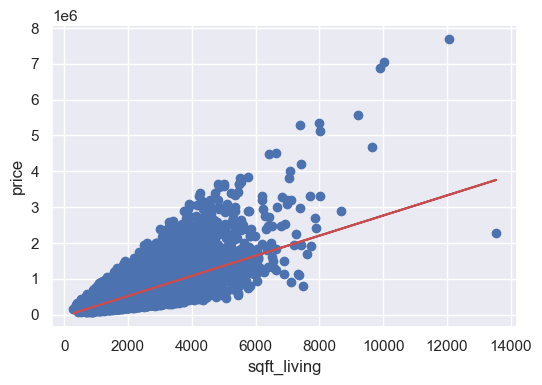

In [56]:
fig = plt.figure(dpi = 100)
plt.scatter(x,y)
plt.xlabel('sqft_living') 
plt.ylabel('price')
plt.plot(x,lreg.predict(x),'r')

In [58]:
from sklearn import linear_model # compare with the scikit learn package
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(x.reshape(-1,1),y) #only accept 2D-array as x

LinearRegression()

In [59]:
print(lreg.w,lreg.b) #coeffs from our method
print(lreg_sklearn.coef_, lreg_sklearn.intercept_) #coeffs from scikit learn

280.8066899295007 -43867.60153385566
[280.80668993] -43867.601533855544


In [60]:
lreg_sklearn.score(x.reshape(-1,1),y) #same R^2 regression score up to 15 significant digits

0.49286538652201417

In [14]:
help(lreg_sklearn)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

## Motivating Example II: Multi-variable Linear Regression (OLS -- Ordinary Least Square)

### **Problem**
Given the *training dataset* $\left(x^{(i)},y^{(i)}\right), i= 1,2,..., N$, this time with $y^{(i)}\in \mathbb{R}$ and $x^{(i)}\in\mathbb{R}^{p}$, we fit the multi-variable linear function

$$y\approx\mathbf{f}(x)=\beta_{0}+\beta_{1}x_{1}+..+\beta_{p}x_{p} = \tilde{x}\beta,$$  
    $$\tilde{x}=(1,x_{1},..,x_{p})\in\mathbb{R}^{1\times (p+1)},\beta = (\beta_{0},\beta_{1},..,\beta_{p})^{T}\in\mathbb{R}^{(p+1)\times 1}.$$


We call $\beta$ the regression coefficients, and $\beta_{0}$ specially refers to the intercept.

When $p = 2$, we are finding a plane of best fit. When $p > 2$, we are finding a hyperplane of best fit.

Note that the dot product of $\tilde{x}\beta = f(x)$ (try this out).

Using the whole training dataset, we can write as 

$$Y=\left(
 \begin{matrix}
   y^{(1)}\\
   y^{(2)} \\
   \cdots \\
   y^{(N)}
  \end{matrix} 
\right)\approx\left(
  \begin{matrix}
   \mathbf{f}(x^{(1)})\\
   \mathbf{f}(x^{(2)})\\
   \cdots \\
   \mathbf{f}(x^{(N)})
  \end{matrix} 
\right)=\left(
  \begin{matrix}
   \tilde{x}^{(1)}\beta\\
   \tilde{x}^{(2)}\beta\\
   \cdots \\
   \tilde{x}^{(N)}\beta
  \end{matrix} 
\right)=\left(
  \begin{matrix}
   \tilde{x}^{(1)}\\
   \tilde{x}^{(2)}\\
   \cdots \\
   \tilde{x}^{(N)}
  \end{matrix} 
\right)\beta = \tilde{X}\beta,
$$

where 
$$
\tilde{X}=\left(
  \begin{matrix}
   \tilde{x}^{(1)}\\
   \tilde{x}^{(2)}\\
   \cdots \\
   \tilde{x}^{(N)}
  \end{matrix} 
\right) =\left(
  \begin{matrix}
   1& x_{1}^{(1)} & \cdots & x_{p}^{(1)}\\
   1& x_{1}^{(2)} & \cdots & x_{p}^{(2)}\\
   \cdots \\
   1& x_{1}^{(N)} & \cdots & x_{p}^{(N)}
  \end{matrix} 
\right)
$$
is also called the augmented data matrix.

- **Question**: To get unknown $\beta$, can we directly solve the linear equation $\tilde{X}\beta = Y$?

- **Answer**: Most times no, because:
    1. typically there are more equations than variables ($N>>(p+1)$) 
    2. the linear model is merely the approximation to the real mapping 
    3. there are noises in the data points -- it's highly possible that there is NO solution at all!

- **Strategy**: Instead of solving $\tilde{X}\beta = Y$ exactly, we want $\beta$ such that $\tilde{X}\beta$ is as close as $Y$ as possible. 

### Training the model

- With the training dataset, define the loss function $L(\beta)$ of parameters $\beta$, which is also called **mean squared error** (MSE) $$\text{MSE} = L(\beta)=\frac{1}{N}\sum_{i=1}^N\big(\hat{y}^{(i)}-y^{(i)}\big)^2 = \frac{1}{N}\sum_{i=1}^{N}\left(\tilde{x}^{(i)}\beta - y^{(i)}\right)^{2},$$
where $\hat{y}^{(i)}$ denotes the predicted value of y at $x^{(i)}$, i.e. $$\hat{y}^{(i)} = \beta_{0}+\beta_{1}x^{(i)}_{1}+..+\beta_{p}x^{(i)}_{p} = \tilde{x}^{(i)}\beta.$$ 
    
    Now the problem becomes $$\min_{\beta}L(\beta),$$ i.e. find the minimizer of a multi-variable (p+1 dimensions) function.


- Then find the minimum of loss function -- There are two ways, either by numerical optimization (will be introduced in discussion) or by solving linear systems (introduced below), which is also called the **normal equation** approach.


To solve the critical points, we have $\nabla L(\beta)=0$ (same as in multivariable calculus).
$$
\begin{aligned}
\frac{\partial L}{\partial \beta_{0}}&=2\sum_{i=1}^{N}(\tilde{x}^{(i)}\beta-y^{(i)})=0,\\
\frac{\partial L}{\partial \beta_{k}}&=2\sum_{i=1}^{N} x_{k}^{(i)}(\tilde{x}^{(i)}\beta-y^{(i)})=0,\quad k=1,2,..,p.
\end{aligned}
$$

In Matrix form, it can be expressed as (left as exercise) $$\tilde{X}^{T}\tilde{X}\beta=\tilde{X}^{T}Y,$$

also called the **normal equation** of linear regression. 
The optimal parameter 
$\hat{\beta}=\text{argmin} L(\beta)$
is also called the ordinary least square (**OLS**) estimator in statistics community.

Then the OLS estimator can be solved as $$\hat{\beta}=(\tilde{X}^{T}\tilde{X})^{-1}\tilde{X}^{T}Y.$$

**[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares#Projection)**

Denote $\tilde{X}=(\tilde{X}_{0},\tilde{X}_{1},..,\tilde{X}_{p})$, then $\tilde{X}\beta=\sum_{k=0}^{p}\beta_{k}\tilde{X}_{k}$. We require that the residual $Y-\tilde{X}\beta$ is orthogonal (i.e. normal, or vertical) to the plane spanned by $\tilde{X}_{k}$, which yields $$\tilde{X}_{k}^{T}(Y-\tilde{X}\beta)=0,\quad k = 0,1,...,p$$

**Exercise**: Check that when $p=1$, the solution is equivalent to the single-variable regression. 

### Prediction in Test Data

Given the new observation called $x^{(test)}$, we have the prediction as $$\hat{y}^{(test)}=\hat{\beta}_{0}+\hat{\beta}_{1}x^{(test)}_{1}+..+\hat{\beta}_{p}x^{(test)}_{p} = \tilde{x}^{(test)}\hat{\beta}.$$

### Evaluating the model

- MSE: The smaller MSE indicates better performance
- R-Squared: The larger $R^{2}$ (closer to 1) indicates better performance. Compared with MSE, R-squared is **dimensionless**, not dependent on the units of variable. 

$$R^{2} = 1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{\text{MSE}}{\text{Var}(Y)}$$

The coding of multi-variable linear regression left as the homework this week. Below we will call the function in sklearn directly.

[Link to where X and y are defined in our notebook](#X_house)

In [61]:
from sklearn import linear_model # compare with the scikit learn package
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,y) 
lreg_sklearn.score(X,y)

0.6070919341230852

In [62]:
lreg_sklearn.coef_

array([-3.46669591e+04, -1.48698203e+04,  1.34078969e+02,  2.67695148e-02,
       -3.00709892e+03,  5.85782331e+05,  5.98910372e+04,  5.38601479e+04,
        1.00892579e+05,  5.22508347e+01,  8.18281340e+01,  1.10527941e+01,
       -7.49796930e-01])

In [63]:
lreg_sklearn.intercept_

-690582.9505203539

## Motivating Example III: Single-variable Polynomial Regression (Special Case of Multivariable Linear Regression)

### **Problem**
Given the *training dataset* $(x^{(i)},y^{(i)}), i= 1,2,..., N$, this time with $y^{(i)}\in \mathbb{R}$ and $x^{(i)}\in\mathbb{R}$, we fit the single-variable polynomial function of $p$-th order

$$y\approx f(x)=w_{0}+w_{1}x+w_{2}x^{2}+...+w_{p}x^{p}$$  

**Remark:** A basic conclusion in numerical analysis is that with N points, we can have a polynomial of order (N-1) that fits every point perfectly.
 
### **Strategy**
Single-variable **polynomial regression** is a special case of multi-variable **linear** regression, because we can construct a dataset of $p$ variables by defining each row as $(1, x,x^{2}, ..., x^{p})$ for each observation at $x$. 

___
##  Machine Learning: Overview of the whole picture
Possible hierarchies of machine learning concepts:

- **Problems**: Supervised Learning (Regression,Classification), Unsupervised Learning (Dimension Reduction, Clustering), Reinforcement Learning (Not covered in this course)


- **Models**: 
    - (Supervised) Linear Regression, Logistic Regression, K-Nearest Neighbor (kNN) Classification/Regression, Decision Tree, Random Forest, Support Vector Machine, Ensemble Method, Neural Network...
    - (Unsupervised) K-means, Hierachical Clustering, Principle Component Analysis, Manifold Learning (MDS, IsoMap, Diffusion Map, tSNE), Auto Encoder...
    

- **Algorithms**: Gradient Descent, Stochastic Gradient Descent (SGD), Back Propagation (BP),Expectation–Maximization (EM)...
    
    
For the same **problem**, there may exist multiple **models** to describe it. Given the specific **model**, there might be many different **algorithms** to solve it.

Why there is so much diversity? The following two fundamental principles of machine learning may provide theoretical insights.

**[Bias-Variance Trade-off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)**: Simple models -- large bias, low variance. Complex models -- low bias, large variance. It's totally possible for a model with a worse fit on training data has a better fit on test data.

<div>
<img src="./img_10/bias_and_fitting.png">
</div>

**[No Free Lunch Theorem](https://analyticsindiamag.com/what-are-the-no-free-lunch-theorems-in-data-science/#:~:text=Once%20Upon%20A%20Time,that%20they%20brought%20a%20drink)**: (in plain language) There is no one model that works best for every problem. (more quantitatively) Any two models are equivalent when their performance averaged across all possible problems. --Even true for [optimization algorithms](https://en.wikipedia.org/wiki/No_free_lunch_in_search_and_optimization).

---

## Extensions of OLS:  MLE, Regularization, Ridge Regression and LASSO

*Note: The detailed mathematical derivations below are optional material. What you need to know for quizzes/exams is:*

1) what is the relation between MLE (most likelihood estimation) and the loss function in OLS regression (ordinary least-square) ;

2) the basic concepts of Ridge regression and LASSO ;

3) where does the additional regularization terms in the loss function of Ridge and LASSO come from ;

4) which model has the best performance on training/test dataset? (or is there any theoretical guarantee?)

### Most Likelihood Estimation (MLE) and loss function in OLS
We already known what the loss function looks like in OLS. Here we first provide a mathematical explanation of this loss function from the perspective of 
Most Likelihood Estimation (MLE).

Recall that in linear regression, our **model assumption** is 

$$y^{(i)}=\tilde{x}^{(i)}\beta+\epsilon^{(i)}, i = 1,2,.., N$$ 

Now we further **assume** that residuals or errors $\epsilon^{(i)}$ are as independent Gaussian random variables with identical distribution $\mathcal{N}(0,\sigma^{2})$ which has mean 0 and standard deviation $\sigma$.

From the density function of Gaussian distribution, the probability to observe $\epsilon^{(i)}$ within the small interval $[z,z+\Delta z]$ is roughly $$\mathbb{P}(z<\epsilon^{(i)}<z+\Delta z) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left({-\frac{z^2}{2\sigma^2}}\right)\Delta z.$$

From the data, we know indeed $z=y^{(i)}-\tilde{x}^{(i)}\beta$. Therefore, given $x^{(i)}$ as fixed, the conditional probability density (likelihood) to observe $y^{(i)}$ is roughly $$l(y^{(i)}|\beta; x^{(i)})=\frac{1}{\sqrt{2\pi}\sigma}\exp\left({-\frac{(y^{(i)}-\tilde{x}^{(i)}\beta)^2}{2\sigma^2}}\right).$$

Using the *independence* assumption, the overall likelihood to observe the response data $y^{(i)} \, (i=1,2,...,N)$ is 

$$\mathcal{P}(y^{(i)},1\leq i\leq N|\beta; x^{(i)})=\prod_{i=1}^{N}l(y^{(i)}|\beta; x^{(i)})$$

The famous **Maximum Likelihood Estimation (MLE)** theory in statistics **assumes** that we aim to find the unknown parameter $\beta$ that maximizes the conditional distribution $\mathcal{P}(\beta \,| \, x^{(i)},y^{(i)},1\leq i\leq N)$ by treating $x^{(i)}$ and $y^{(i)}$ as fixed numbers. 

Equivalently (using the properties of logarithms), as the function of $\beta$, we can maximize $$\ln \mathcal{P}= \sum_{i=1}^{N}\ln l(y^{(i)}|\beta;x^{(i)}).$$ 

By removing the constants, we finally arrives at the **minimization** problem of $L^{2}$ loss function (whose difference with **MSE -- mean squared error** is only up to the factor 1/N)
$$N\cdot\text{MSE} = N\cdot L(\beta)=\sum_{i=1}^{N}(y^{(i)}-\tilde{x}^{(i)}\beta)^{2}= ||Y-\tilde{X}\beta||_{2}^2.$$

### MAP (instead of MLE) Estimation in Bayesian Statistics

**Recall** the likelihood function -- we interpret it as the probability of observing the response data, given the parameter $\beta$ as fixed, i.e. conditional probability

$$\mathcal{P}(y^{(i)},1\leq i\leq N|x^{(i)},\beta)=\prod_{i=1}^{N}l(y^{(i)}|x^{(i)},\beta)$$

Now we take a Bayesian approach -- assume $\beta$ is the random variable with **prior distirbution** $\mathcal{P}(\beta)$. Then the **posterior distribution** of $\beta$ given the data is  


$$\mathcal{P}(\beta|x^{(i)},y^{(i)},1\leq i\leq N)\propto \mathcal{P}(\beta)\mathcal{P}(y^{(i)},1\leq i\leq N|\beta,x^{(i)}).$$


The **Bayesian** estimation aims to maximize the posterior distribution. It is formally termed as **Maximum A-Posteriori Estimation (MAP)**. Note that 


$$\text{argmax}_{\beta}\mathcal{P}(\beta|x^{(i)},y^{(i)},1\leq i\leq N)=\text{argmax}_{\beta}\ln\mathcal{P}(\beta|x^{(i)},y^{(i)},1\leq i\leq N)$$

In other words, $\beta$ maximizes one function if and only if it maximizes the other, and vice versa.


- Case 1: The prior distribution $\mathcal{P}(\beta_{i}=x)\propto \exp(-x^{2}), i\geq 1$ is Gaussian-like, and different $\beta_{i}$ are independent. Now the minimization problem becomes 

    $$\min_{\beta} ||Y-\tilde{X}\beta||_{2}^2+\lambda||\beta||_{2}^{2}.$$

    here $||\beta||_{2}^{2}=\sum_{i=1}^{p}\beta_{i}^{2}.$
    This is called **Ridge Regression**. 
    
    
- Case 2: The prior distribution $\mathcal{P}(\beta_{i}=x)\propto \exp(-|x|), i\geq 1$ is double-exponential (Laplace) like, and different $\beta_{i}$ are independent. Now the minimization problem becomes 

    $$\min_{\beta} ||Y-\tilde{X}\beta||_{2}^2+\lambda\sum_{i=1}^{p}|\beta_{i}|$$
    
    This is called [**LASSO Regression**](https://en.wikipedia.org/wiki/Lasso_(statistics)).
    
    
    
In general, these additional terms are called the **regularization terms**. In statistics, regularization is equivalent to Bayesian prior. Here $\lambda$ is the adjustable parameter in algorithm --  its choice is empirical while sometimes very important for model performance (where the word "alchemy" arises in machine learning) Roughly it controls the **complexity** of the model:

- If $\lambda\to\infty$, we have $\beta_{i}\to 0 (i\geq 1)$ and $\beta_{0} = \bar{y}$. (no complexity in the model)
- If $\lambda\to 0 $, it will yield the same results with OLS. (Same complexity in model as OLS)

Why control the complexity? Recall the bias-variance tradeoff -- sometimes reducing the complexity of a model **might** help to improve performance in the test dataset.

### Algorithm consideration 

The optimization for ridge regression is similar to OLS -- try to derive the analytical solution your self. The optimization for LASSO is [non-trival](https://www.cs.ubc.ca/~schmidtm/Documents/2005_Notes_Lasso.pdf) and is the important topic in convex optimization. 

### Prediction in Test Data

Now from the same training dataset, we have three $\beta$ estimated from three different models, namely $\hat{\beta}^{OLS},\hat{\beta}^{Ridge},\hat{\beta}^{Lasso}$ because they are the minimizers of three different loss functions.

Given the new observation called $x^{(test)}$, the formal expression of predictions from different methods are the same $$\hat{y}^{(test)}=\hat{\beta}_{0}+\hat{\beta}_{1}x^{(test)}_{1}+..+\hat{\beta}_{p}x^{(test)}_{p} = \tilde{x}^{(test)}\hat{\beta}.$$

The **only** difference is what $\hat{\beta}$ we use. Of course, the corresponded prediction values are also different.

### Model Performance Evaluation

   - Mean Square Error (MSE) -- the lower, the better (in test data):  $\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}$
   - R-squared (coefficient of determination, $R^{2}$) -- the larger, the better (in test data): $1 - \frac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^{2}} = 1 - \frac{MSE}{Var(Y)}$
   

Question: What about on the training dataset?

Conclusion: **By definition**, compared with Ridge or LASSO regression, OLS **will be sure** to have the smallest MSE (hence largest $R^{2}$) on **training dataset**. Think why!

## Example: Diabetes Dataset

We use the [scikit-learn package](https://scikit-learn.org/stable/index.html) to load the data and run regression. More tutorials about linear models can be [found here](https://scikit-learn.org/stable/modules/linear_model.html).

Data from [this paper](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf) by Professor [Robert Tibshirani et al](https://statweb.stanford.edu/~tibs/index.html).

In [1]:
from sklearn import datasets
X,y= datasets.load_diabetes(return_X_y = True)

In [2]:
help(datasets.load_diabetes)

Help on function load_diabetes in module sklearn.datasets._base:

load_diabetes(*, return_X_y=False, as_frame=False)
    Load and return the diabetes dataset (regression).
    
    ==============   ==================
    Samples total    442
    Dimensionality   10
    Features         real, -.2 < x < .2
    Targets          integer 25 - 346
    ==============   ==================
    
    .. note::
       The meaning of each feature (i.e. `feature_names`) might be unclear
       (especially for `ltg`) as the documentation of the original dataset is
       not explicit. We provide information that seems correct in regard with
       the scientific literature in this field of research.
    
    Read more in the :ref:`User Guide <diabetes_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versio

In [5]:
X_fr,y_fr= datasets.load_diabetes(return_X_y = True, as_frame=True) #not required for Regression
X_fr #This just gives us a better description of the values in X
#The categories themselves are normalized, so they are not simple 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
y_fr

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

Generate the training and test dataset by random splitting

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#do not use random_state unless specifically asked in an assignment

In [10]:
print(X_train.shape)
print(y_test.shape)

(397, 10)
(45,)


In [11]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

Ordinary Least Square (OLS) Linear Regression

In [12]:
from sklearn import linear_model
reg_ols = linear_model.LinearRegression()
reg_ols.fit(X_train,y_train) # train the parameters in training dataset

LinearRegression()

In [24]:
dir(reg_ols)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [13]:
reg_ols.coef_

array([  19.92576904, -262.55453086,  509.19112446,  336.09693678,
       -849.29530342,  480.22076125,  120.68418641,  236.71853501,
        716.61035542,   70.41045019])

In [14]:
y_pred_ols = reg_ols.predict(X_test) # generate predictions in test dataset
y_pred_ols

array([143.06621271, 177.70923973, 134.80159283, 288.66523611,
       123.58429291,  96.64399491, 252.70865552, 183.51563317,
        93.96508916, 109.83316004,  98.04648824, 168.61502622,
        58.09759262, 206.5896178 , 102.4078438 , 130.25693511,
       218.0570909 , 245.9207401 , 193.24351477, 214.36945188,
       208.82778064,  90.55665059,  74.15304744, 187.1216387 ,
       156.36442036, 157.46376883, 184.17736744, 177.18027887,
        52.24263585, 110.66673778, 174.05918425,  90.89850309,
       133.07968763, 183.22988596, 173.93725211, 189.85248233,
       125.86458581, 121.53390004, 148.94895292,  60.82842472,
        76.36312191, 106.40220555, 162.20473499, 153.15077269,
       174.23003255])

In [15]:
from sklearn.metrics import mean_squared_error
mse_ols = mean_squared_error(y_test, y_pred_ols)
R2_ols =  reg_ols.score(X_test,y_test) # the R-squared value -- how good is the fitting in test dataset?
print(mse_ols,R2_ols)

2743.8800467688466 0.5514251914993502


In [16]:
reg_ridge = linear_model.Ridge(alpha=.02) # alpha is proportional to the lambda above -- only up to the constant
reg_ridge.fit(X_train,y_train)
print(reg_ridge.coef_)

y_pred_ridge = reg_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
R2_ridge =  reg_ridge.score(X_test,y_test)
print(mse_ridge,R2_ridge)

[  21.70557246 -252.8105591   507.97196544  328.21420703 -280.47609687
   37.89517179 -127.46013757  163.28415598  497.87046059   77.00701528]
2735.677504142067 0.5527661590071533


In [17]:
reg_lasso = linear_model.Lasso(alpha=0.1) # alpha is proportional to the lambda above -- only up to the constant
reg_lasso.fit(X_train,y_train)
print(reg_lasso.coef_)

y_pred_lasso = reg_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
R2_lasso =  reg_lasso.score(X_test,y_test)
print(mse_lasso,R2_lasso)

[   0.         -173.66792464  510.09537263  286.77901824  -64.43166585
   -0.         -226.79324775    0.          453.3557073    44.84749075]
2636.3323830017634 0.569007291247414


In [18]:
print(reg_ols.score(X_train,y_train)) # note that we calculate score on TRAINING dataset
print(reg_ridge.score(X_train,y_train))
print(reg_lasso.score(X_train,y_train))

0.5125152248773208
0.5102072320833588
0.5024076500883519


By definition, OLS has the smallest MSE (largest R-squared) on **training dataset**. What about on the test dataset?

In [19]:
import numpy as np
train_errors = list()
test_errors = list()
alphas = np.logspace(-5, -1, 20)
for alpha in alphas:
    reg_lasso.set_params(alpha=alpha) # change the parameter of reg_lasso
    reg_lasso.fit(X_train, y_train)
    train_errors.append(reg_lasso.score(X_train, y_train))
    test_errors.append(reg_lasso.score(X_test, y_test))

In [20]:
print(alphas)

[1.00000000e-05 1.62377674e-05 2.63665090e-05 4.28133240e-05
 6.95192796e-05 1.12883789e-04 1.83298071e-04 2.97635144e-04
 4.83293024e-04 7.84759970e-04 1.27427499e-03 2.06913808e-03
 3.35981829e-03 5.45559478e-03 8.85866790e-03 1.43844989e-02
 2.33572147e-02 3.79269019e-02 6.15848211e-02 1.00000000e-01]


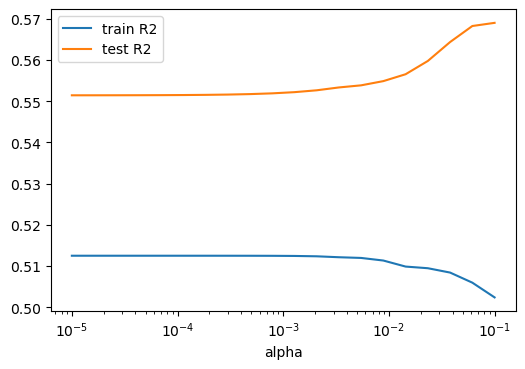

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi=100)
plt.semilogx(alphas,train_errors,label = 'train R2')
plt.semilogx(alphas,test_errors,label = 'test R2')
plt.xlabel('alpha')
plt.legend()

Therefore, a good model in training dataset does not mean it's a good model in the final test dataset. Then how can we use the best model (i.e. model with best regularization parameters)?

### [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

What if we don't know the true labels in test, but the performance in test is so important to us so that we really want to select a model with greater confidence with traning dataset?

As discussed previously, we can use traning dataset to make 10 "quizzes" (each "quiz" is called a validation dataset), and let the three models to compete based on the 10 "competitions". This is called 10-fold cross-validation.

For the more detailed discussion and distinguishment between training, validation and test datasets, you can refer to this [wikipedia link](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets#Test_dataset).

In [22]:
from sklearn.model_selection import cross_val_score
scores_lasso = cross_val_score(reg_lasso, X_train, y_train, cv=10) # cross-validation function in sklearn
scores_ridge = cross_val_score(reg_ridge, X_train, y_train, cv=10)
scores_ols = cross_val_score(reg_ols, X_train, y_train, cv=10)

In [23]:
print(scores_lasso)
print(scores_ridge)
print(scores_ols)

[0.24777555 0.59326777 0.47897959 0.5352791  0.32317178 0.47569164
 0.6518041  0.56942576 0.25184587 0.36446431]
[0.24342237 0.57522902 0.52325584 0.53031117 0.34021405 0.48194162
 0.6585968  0.57423334 0.24263773 0.33362724]
[0.23604669 0.57037558 0.53700808 0.52611281 0.34264557 0.49282279
 0.66256801 0.57878559 0.19975324 0.34375095]


In [36]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv

In [24]:
import pandas as pd
scores_all = pd.DataFrame({"lasso": scores_lasso,"ols": scores_ols, "ridge":scores_ridge})
scores_all

,lasso,ols,ridge
0,0.247776,0.236047,0.243422
1,0.593268,0.570376,0.575229
2,0.478980,0.537008,0.523256
3,0.535279,0.526113,0.530311
4,0.323172,0.342646,0.340214
5,0.475692,0.492823,0.481942
6,0.651804,0.662568,0.658597
7,0.569426,0.578786,0.574233
8,0.251846,0.199753,0.242638
9,0.364464,0.343751,0.333627


In [25]:
type(scores_lasso)

numpy.ndarray

Besides mean and standard deviation, we can also use the [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) to visualize the results.

<AxesSubplot:>

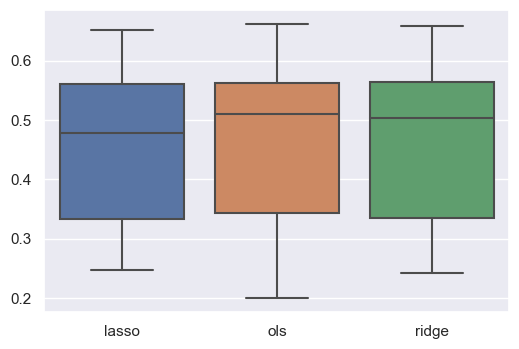

In [26]:
import seaborn as sns
sns.set_theme()
fig, ax = plt.subplots(dpi=100)
sns.boxplot(data = scores_all)

In [27]:
scores_all.describe()

,lasso,ols,ridge
count,10.000000,10.000000,10.000000
mean,0.449171,0.448987,0.450347
std,0.144468,0.157290,0.148598
min,0.247776,0.199753,0.242638
25%,0.333495,0.342922,0.335274
50%,0.477336,0.509468,0.502599
75%,0.560889,0.562034,0.563253
max,0.651804,0.662568,0.658597


Of course, the final judgement is still in the test dataset.

In [28]:
reg_lasso.score(X_test,y_test)

0.569007291247414

In [29]:
reg_ridge.score(X_test,y_test)

0.5527661590071533

In [30]:
reg_ols.score(X_test,y_test)

0.5514251914993502

Exercise: Use cross-validation to select the `alpha` parameter in LASSO

In [44]:
# your code here
#test_errors = list()
alphas = np.logspace(-5, -1, 20)
train_errors = np.zeros_like(alphas)
for ind, alpha in enumerate(alphas):
    reg_lasso.set_params(alpha=alpha) # change the parameter of reg_lasso
    #reg_lasso.fit(X_train, y_train)
    scores_lasso = cross_val_score(reg_lasso, X_train, y_train, cv=10)
    #train_errors.append(reg_lasso.score(X_train, y_train))
    #score_mean = scores_lasso.mean()
    train_errors[ind]= scores_lasso.mean()
    #test_errors.append(reg_lasso.score(X_test, y_test))

In [45]:
print(train_errors)
print(train_errors.max())
print(train_errors.argmax())
print(alphas[train_errors.argmax()])

[0.44898873 0.44898985 0.44899167 0.44899459 0.4489993  0.44900684
 0.44901877 0.44903735 0.44906542 0.44910546 0.44919526 0.44935973
 0.44972176 0.44992911 0.44901409 0.44909977 0.45044024 0.45092872
 0.45140977 0.44917055]
0.4514097740599895
18
0.06158482110660261


In [46]:
reg_lasso_new = linear_model.Lasso(alpha=alphas[train_errors.argmax()]) # alpha is proportional to the lambda above -- only up to the constant
reg_lasso_new.fit(X_train,y_train)
print(reg_lasso_new.coef_)

y_pred_lasso_new = reg_lasso_new.predict(X_test)
mse_lasso_new = mean_squared_error(y_test, y_pred_lasso_new)
R2_lasso_new =  reg_lasso_new.score(X_test,y_test)
print(mse_lasso_new,R2_lasso_new)

[   0.         -202.49710284  513.13597299  303.12781379 -101.29843297
   -0.         -237.82654836    0.          474.55221916   58.20204323]
2641.0204812969946 0.5682408718853533


## Reference Reading Suggestions 

- ISLR: Chapter 2,3,6
- ESL: Chapter 1,2,3
- PML: Chapter 1,2,3,4,7,11
- DL: Chapter 5